# Geração Interativa da curva de Bézier

In [1]:
import numpy as np

In [2]:
def bezier_linear(p1, p2, t): #
    return (1.0 - t) * p1 + t * p2

def interpolar_pontos(pontos, t): #chama bezier x,y para cada par de coordenadas
    return [bezier_linear(p1, p2, t) for p1, p2 in zip(pontos, pontos[1:])]

def bezier(pontos_controle, t, parada=2): #seleciona pontos para a chamada de bezier
    pontos = pontos_as_arrays(pontos_controle)
    while len(pontos) > parada:
        pontos = interpolar_pontos(pontos, t)
        
    return bezier_linear(pontos[0], pontos[1], t)

def pontos_as_arrays(tupla_pontos): #separa a lista de pontos em tuplas (x,y)
    return [np.array(p) for p in tupla_pontos]

In [3]:
%matplotlib nbagg

In [4]:
import matplotlib.pyplot as plt
from collections import namedtuple

In [5]:
def plot_curva_bezier(pontos_controle):
    tempo = np.linspace(0, 1, num=1000)
    curva = [bezier(pontos_controle, t) for t in tempo]
    x, y = list(zip(*pontos_controle))
    curva_x, curva_y = zip(*curva)
    
    plt.plot(x, y, 'bo-', curva_x, curva_y, 'r') #delimita as cores para as curvas 

In [6]:
def callback(evento): #seleciona pontos de controle clicando com o botão esquerdo do mouse
   
    global  lista_pontos
    if evento.button==1 and evento.inaxes:
        x, y = evento.xdata, evento.ydata
      
        lista_pontos.append((x,y))  
        plt.plot(x, y, 'bo') 
       
    elif evento.button==3:  #plota as linhas e a curva ao clicar com o botão direito do mouse
        plot_curva_bezier(lista_pontos) 
        plt.draw()     
    
    else: pass

In [7]:
def eixos(): #plota o grid da figura
    
    figura = plt.figure(figsize=(6, 5))
    eixo = figura.add_subplot(111)

    eixo.set_xlim([0, 1])
    eixo.set_ylim([0, 1])
    eixo.grid('on')   
    eixo.set_autoscale_on(False)
    figura.canvas.mpl_connect('button_press_event', callback)

<IPython.core.display.Javascript object>


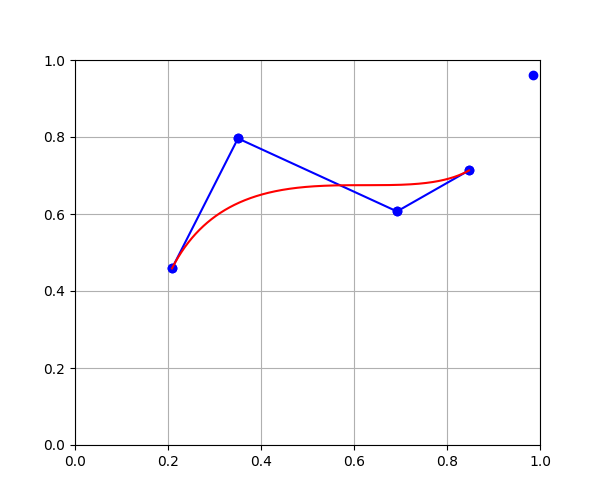

In [8]:
lista_pontos = []
eixos()